In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Banoth Sudhar\\Downloads\\archive(4)\\adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


## Normality Test

     QQ Plot
    Shapiro Wilk Test
    Anderson Darling Test



## Q-Q Plots  

In [6]:
from scipy import stats

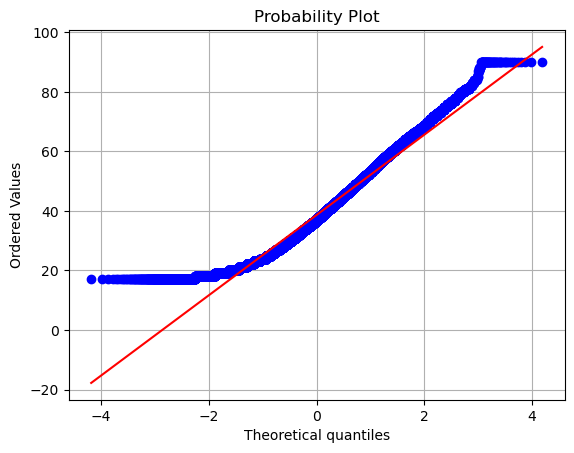

In [7]:
stats.probplot(df['age'],dist='norm',plot=plt)
plt.grid()

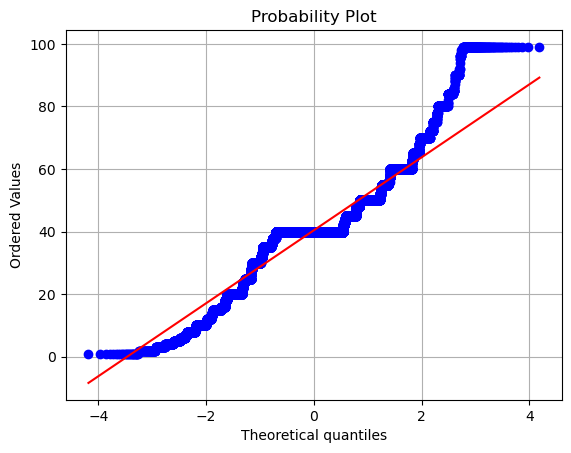

In [8]:
stats.probplot(df['hours-per-week'],dist='norm',plot=plt)
plt.grid()

<Figure size 600x400 with 0 Axes>

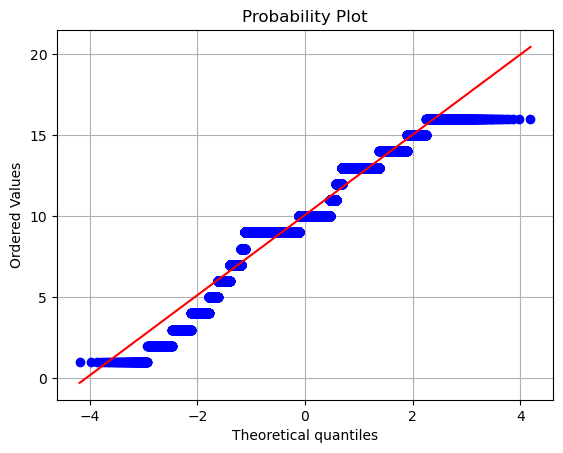

<Figure size 600x400 with 0 Axes>

In [9]:
stats.probplot(df['educational-num'],dist='norm',plot=plt)
plt.grid()
plt.figure(figsize=(6,4))



## * Shapiro Wilk Test for Normality

   #### Assumptions

       Observations in each sample are independent and identically distributed (iid).

  #### Interpretation

    H0: the sample has a Gaussian distribution.
    H1: the sample does not have a Gaussian distribution.

    Cons

#### Cannot deal with more than 5000 data points



In [10]:
def shapiro_wilk(data):
    stat ,p=stats.shapiro(data)
    print('stat=%.3f,p=%3f' % (stat,p))
    
    if p>0.05:
        print('probability gaussion')
    else:
        print("probability not gaussion")

In [11]:
shapiro_wilk(df['age'])

stat=0.967,p=0.000000
probability not gaussion


C:\Users\Banoth Sudhar\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [12]:
def shapiro(data):
    stat,p=stats.shapiro(data)
    print('stat=%.3f,p=%3f' % (stat,p))
    
    if p>0.06:
        print("gaussion found")
    else:
        print('gaussiin not found')

In [13]:
shapiro(df['hours-per-week'])

stat=0.884,p=0.000000
gaussiin not found



### * Anderson-Darling Test

    Tests whether a data sample has a Gaussian distribution.

#### Assumptions

    Observations in each sample are independent and identically distributed (iid).

### * Interpretation

    H0: the sample has a Gaussian distribution.
    H1: the sample does not have a Gaussian distribution.



In [14]:
def anderson_darling(data):
    result=stats.anderson(data)
    print("stat=%.3f" % (result.statistic))
    
    for i in range(len(result.critical_values)):
        sl,cl=result.significance_level[i],result.critical_values[i]
        
        if result.statistic <cl:
            print("probably gaussion  at %.1f%% level" %(sl))
        else:
            if result.statistic <sl:
                prnt('probabably the gaussion %.1f%% level'% (cl))

        

In [15]:
anderson_darling(df['age'])

stat=360.399


In [16]:
anderson_darling(df['hours-per-week'])

stat=2658.084



### Correlation Test

#### *  Numerical vs Numerical Column

    .Scatter Plot
    .Pearson Correlation
    .Spearman Rank Correlation

### * Categorical vs Categorical Column*

    Count Plot
    Crosstab
    Chi Square Test



In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

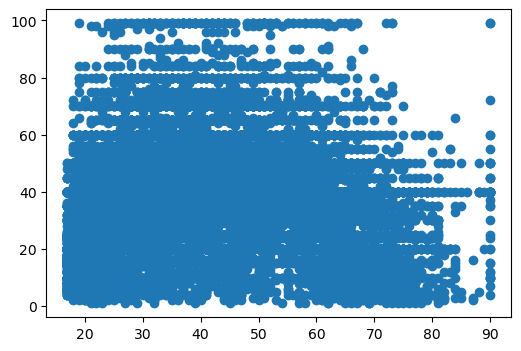

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(df['age'],df['hours-per-week'])
plt.show()

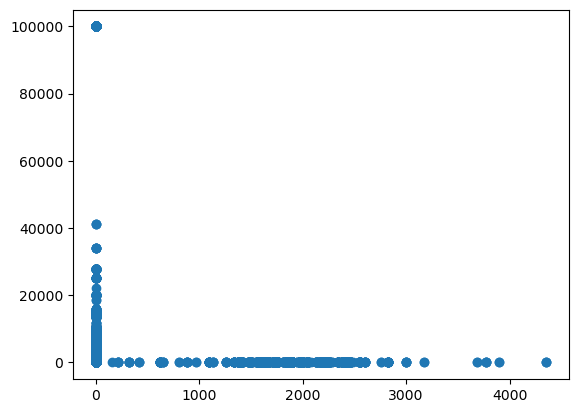

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

In [19]:
plt.scatter(df['capital-loss'],df['capital-gain'])
plt.show()
plt.figure(figsize=(4,3))


### * Pearson’s Correlation Coefficient

    Tests whether two samples have a linear relationship.

#### Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

#### Interpretation

        H0: the two samples are independent.
        H1: there is a dependency between the samples.



In [20]:
def pearson(data1,data2):
    stat,p=stats.pearsonr(data1,data2)
    print('stat=%.3f,p=%.3f'% (stat,p))
    if p>0.05:
        print("probably independent")
    else:
        print('probably dependent')


In [21]:
pearson(df['age'],df['hours-per-week'])

stat=0.072,p=0.000
probably dependent


In [22]:
def spearman(data1,data2):
    stat,p=stats.spearmanr(data1,data2)
    print('stat=%.3f,p=%.3f'% (stat,p))
    if p >0.05:
        print('independent')
    else:
        print("dependent")

In [23]:
spearman(df['age'],df['hours-per-week'])

stat=0.147,p=0.000
dependent



### Chi-Squared Test

    Tests whether two categorical variables are related or independent.

### Assumptions

    Observations used in the calculation of the contingency table are independent.
    25 or more examples in each cell of the contingency table.

### Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.



<Figure size 200x300 with 0 Axes>

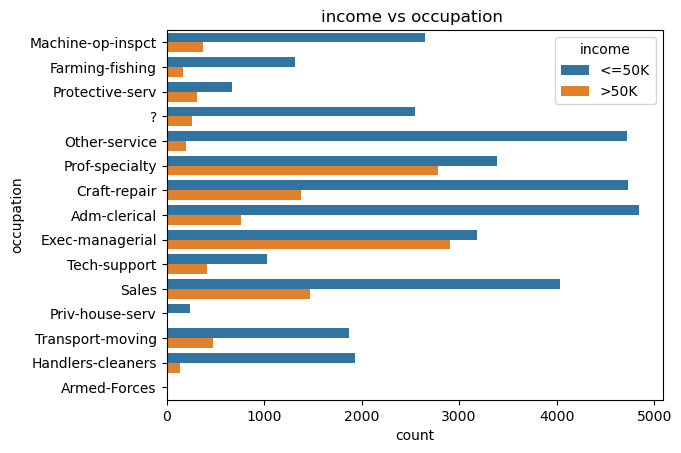

<Figure size 200x300 with 0 Axes>

In [24]:
sns.countplot(y='occupation',hue='income',data=df)
plt.title("income vs occupation ")
plt.figure(figsize=(2,3))

In [25]:
def chi_sqr(data):
    stat,p,dof,expected=stats.chi2_contingency(freq_table)
    print("stat=%.3f,p=%.3f" % (stat,p))
    if p>0.05:
        print('probably independent')
    else:
        print('probably dependent')

In [26]:
freq_table=pd.crosstab(df.occupation,df.income)
freq_table

income,<=50K,>50K
occupation,,
?,2544,265
Adm-clerical,4843,768
Armed-Forces,10,5
Craft-repair,4729,1383
Exec-managerial,3178,2908
Farming-fishing,1317,173
Handlers-cleaners,1934,138
Machine-op-inspct,2650,372
Other-service,4719,204


In [27]:
chi_sqr(freq_table)

stat=5983.164,p=0.000
probably dependent



### Parametric Statistical Hypothesis Tests

  #### This section lists statistical tests that you can use to compare data samples.

    Student's t-test
    Analysis of Variance (ANOVA)

#### *Student’s t-test

    Tests whether the means of two independent samples are significantly different.

### *Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

### *Interpretation

H0: the means of the samples are equal.
H1: the means of the samples are unequal.



In [28]:
from scipy.stats import ttest_ind  ## Calculate the T-test for the means of two independent samples of scores.
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


stat=-0.326, p=0.748
Probably the same distribution



### Analysis of Variance Test (ANOVA)

    Tests whether the means of two or more independent samples are significantly different.

### *Assumptions

    Observations in each sample are independent and identically distributed (iid).
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

#### *Interpretation

    H0: the means of the samples are equal.
    H1: one or more of the means of the samples are unequal.



In [29]:
from scipy.stats import f_oneway   ## Perform one-way ANOVA
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution
